In [1]:
import numpy as np
import pandas as pd

## Get the train and test data

In [2]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(train.shape, test.shape)



(7352, 564) (2947, 564)


In [3]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [4]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [5]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [6]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's play with our data

### Labels that are useful in plotting confusion matrix

In [8]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [288]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [283]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [310]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# 1. Logistic Regression with Grid Search

In [168]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.4min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:02:37.292510


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005119


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


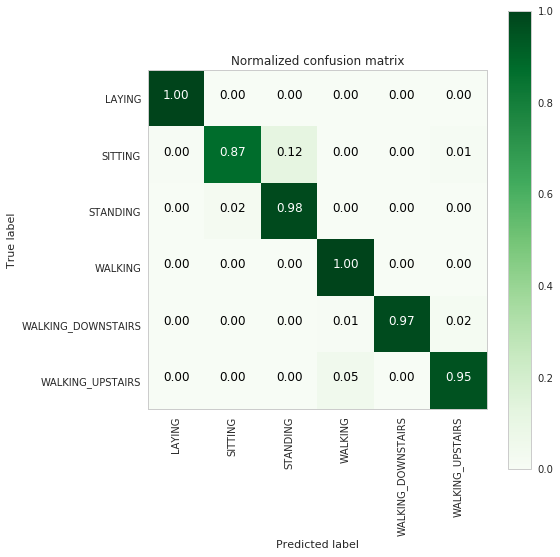

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [290]:

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


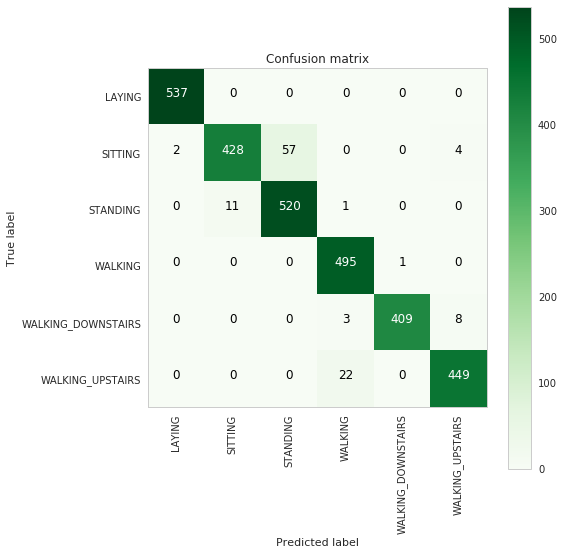

In [299]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [291]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



#  2. Linear SVC with GridSearch

In [294]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   46.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:54.952122


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005238


---------------------
|      Accuracy      |
---------------------

    0.9599592806243638


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 401  84   0   0   5]
 [  0   4 527   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   1   2 412   5]
 [  0   0   0  14   1 456]]


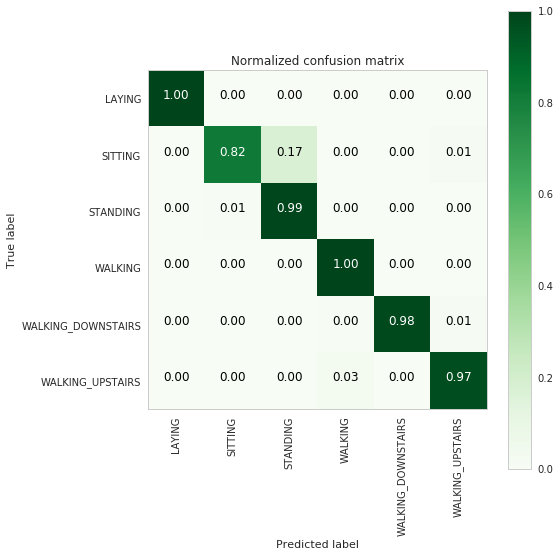

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.99      0.82      0.90       491
          STANDING       0.86      0.99      0.92       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

       avg / total       0.96      0.96      0.96      2947



In [421]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [422]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 2}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9468171926006529



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:10:51.919425


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.729447


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


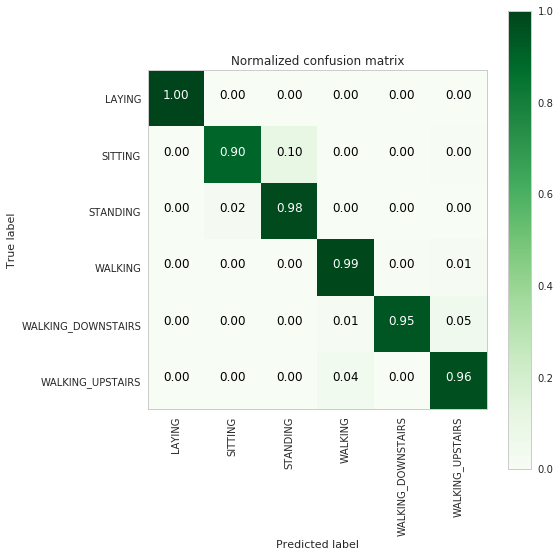

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947



In [346]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [347]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:16.170627


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008934


---------------------
|      Accuracy      |
---------------------

    0.8632507634882932


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 470  18   8]
 [  0   0   0  16 343  61]
 [  0   0   0  73  29 369]]


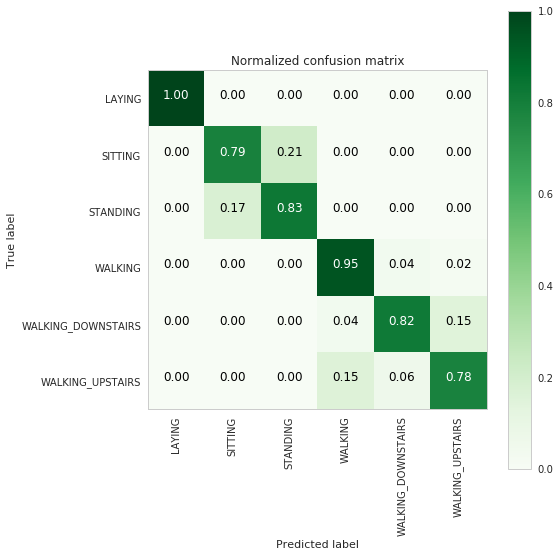

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.88      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

       avg / total       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

--------------------------
|     Best paramete

In [358]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:09:50.549320


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.086756


---------------------
|      Accuracy      |
---------------------

    0.9083814048184594


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 417  74   0   0   0]
 [  0  51 481   0   0   0]
 [  0   0   0 484  11   1]
 [  0   0   0  40 336  44]
 [  0   0   0  43   6 422]]


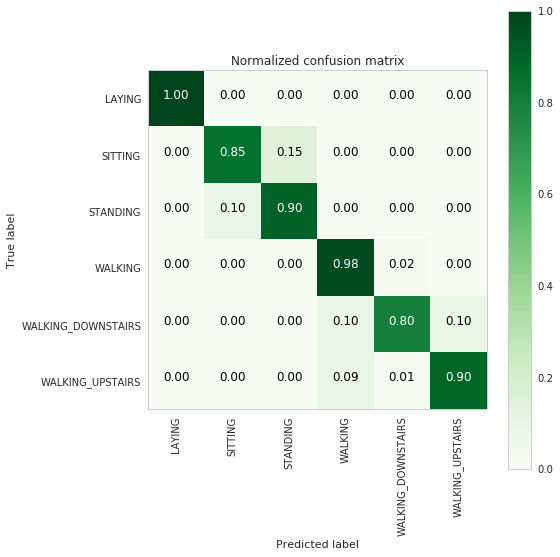

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.85      0.87       491
          STANDING       0.87      0.90      0.89       532
           WALKING       0.85      0.98      0.91       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

       avg / total       0.91      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verb

In [364]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] max_depth=5, n_estimators=90 ....................................
[CV] max_depth=5, n_estimators=90 ....................................
[CV] max_depth=5, n_estimators=90 ....................................
[CV] max_depth=5, n_estimators=110 ...................................
[CV] ..... max_depth=5, n_estimators=90, score=0.921977, total= 6.6min
[CV] max_depth=5, n_estimators=110 ...................................
[CV] ..... max_depth=5, n_estimators=90, score=0.920881, total= 6.6min
[CV] max_depth=5, n_estimators=110 ...................................
[CV] ..... max_depth=5, n_estimators=90, score=0.857259, total= 6.7min
[CV] max_depth=5, n_estimators=130 ...................................
[CV] .... max_depth=5, n_estimators=110, score=0.920065, total= 6.9min
[CV] max_depth=5, n_estimators=130 ...................................
[CV] .... max_depth=5, n_estimators=130, score=0.921697, total= 7.0

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 13.7min


[CV] .... max_depth=5, n_estimators=110, score=0.920343, total= 7.2min
[CV] max_depth=5, n_estimators=150 ...................................
[CV] .... max_depth=5, n_estimators=110, score=0.869494, total= 7.3min
[CV] max_depth=5, n_estimators=150 ...................................
[CV] .... max_depth=5, n_estimators=130, score=0.867863, total= 7.4min
[CV] max_depth=5, n_estimators=150 ...................................
[CV] .... max_depth=5, n_estimators=150, score=0.921697, total= 7.1min
[CV] max_depth=7, n_estimators=90 ....................................
[CV] .... max_depth=5, n_estimators=150, score=0.875204, total= 7.5min
[CV] max_depth=7, n_estimators=90 ....................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 21.4min


[CV] .... max_depth=5, n_estimators=130, score=0.921977, total= 7.9min
[CV] max_depth=7, n_estimators=90 ....................................
[CV] .... max_depth=5, n_estimators=150, score=0.920752, total= 8.1min
[CV] max_depth=7, n_estimators=110 ...................................
[CV] ..... max_depth=7, n_estimators=90, score=0.897635, total= 6.8min
[CV] max_depth=7, n_estimators=110 ...................................
[CV] ..... max_depth=7, n_estimators=90, score=0.899510, total= 6.9min
[CV] max_depth=7, n_estimators=110 ...................................
[CV] ..... max_depth=7, n_estimators=90, score=0.847879, total= 7.1min
[CV] max_depth=7, n_estimators=130 ...................................
[CV] .... max_depth=7, n_estimators=110, score=0.895188, total= 6.9min
[CV] max_depth=7, n_estimators=130 ...................................
[CV] .... max_depth=7, n_estimators=110, score=0.846656, total= 6.9min
[CV] max_depth=7, n_estimators=130 ...................................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 34.7min


[CV] .... max_depth=7, n_estimators=110, score=0.902369, total= 6.7min
[CV] max_depth=7, n_estimators=150 ...................................
[CV] .... max_depth=7, n_estimators=130, score=0.899674, total= 6.8min
[CV] max_depth=7, n_estimators=150 ...................................
[CV] .... max_depth=7, n_estimators=130, score=0.849103, total= 6.9min
[CV] max_depth=7, n_estimators=150 ...................................


[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed: 36.2min remaining:  7.2min


[CV] .... max_depth=7, n_estimators=130, score=0.899510, total= 6.6min
[CV] .... max_depth=7, n_estimators=150, score=0.900489, total= 6.5min
[CV] .... max_depth=7, n_estimators=150, score=0.844209, total= 6.6min
[CV] .... max_depth=7, n_estimators=150, score=0.901961, total= 6.1min


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 42.2min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:49:44.454182


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.105775


---------------------
|      Accuracy      |
---------------------

    0.9229725144214456


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 399  90   0   0   2]
 [  0  38 494   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  31   6 433]]


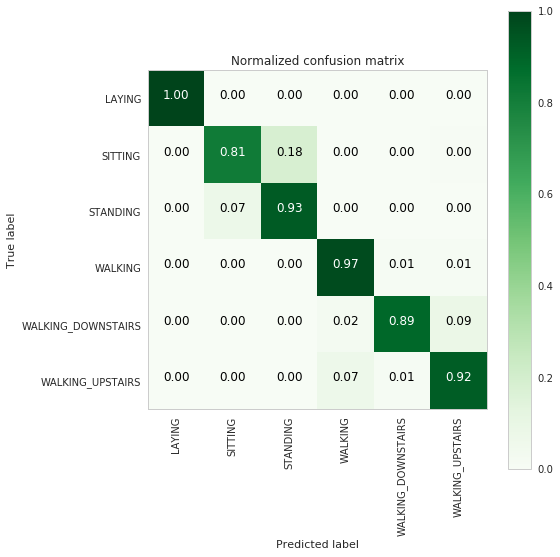

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

       avg / total       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=150, presort='auto', ra

In [378]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])


# 7. Comparing all models

In [658]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.3%       3.699%
Linear SVC          : 96.0%       4.004% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.33%      13.67% 
Random Forest       : 90.84%      9.162% 
GradientBoosting DT : 90.84%      9.162% 


> We can choose ___Logistic regression___ or ___Linear SVC___ or ___rbf SVM___.

# Improving Our model

## 1.  Get the misclassified data

- These are the attributes that we can get from the best model from GridSearch

    - model
    - training_time
    - testing_time
    - predicted
    - accuracy
    - confusion_matrix
    - classification_report


In [466]:
print('Logistic Regression Accuracy : {:,.03}%'.format(log_reg_grid_results['accuracy']*100))

log_reg_pred = log_reg_grid_results['predicted']
print('\nOur model has {}(ie.,{:,.04}%) misclassified points.'.format(sum(log_reg_pred != y_test),\
                                                                  (100-log_reg_grid_results['accuracy']*100)))

bool_misclsfd = log_reg_pred != y_test
mssclfd = test.loc[bool_misclsfd]
print('\n \nSome rows of misclassified points :')

mssclfd.head(3)

Logistic Regression Accuracy : 96.3%

Our model has 109(ie.,3.699%) misclassified points.

 
Some rows of misclassified points :


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
42,0.275747,-0.015388,-0.105058,-0.995814,-0.982480,-0.981914,-0.996652,-0.981452,-0.983212,-0.936969,...,0.133793,-0.179480,0.788973,-0.382063,-0.812523,0.164482,-0.098614,2,4,SITTING
43,0.280283,-0.019175,-0.109322,-0.995313,-0.975241,-0.978922,-0.996139,-0.973738,-0.977447,-0.936969,...,-0.313156,-0.225686,-0.412973,0.577609,-0.812244,0.163983,-0.099165,2,4,SITTING
182,0.231575,0.029387,-0.055042,-0.974816,-0.926952,-0.943930,-0.975645,-0.923428,-0.939722,-0.941363,...,0.097997,-0.171011,-0.113008,-0.602747,-0.703663,0.111204,-0.196333,2,4,SITTING


## 2. Sitting and standing

In [462]:
bool_sit_stand = (test['ActivityName']=='SITTING') | (test['ActivityName']=='STANDING')
df_sit_stand = test.loc[bool_sit_stand]

print(df_sit_stand.ActivityName.value_counts())
df_sit_stand.head(3)

STANDING    532
SITTING     491
Name: ActivityName, dtype: int64


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING


## 3. Analysing test data with t-sne

In [467]:
df_tsne['label'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: label, dtype: int64

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette("Set1", desat=0.8)

plt.rcParams['font.family'] = 'Dejavu Sans'

### 3.1 Get test data in lower dimensions(2D)

In [468]:
# convert 561 feature vector to 2D vector using t-sne
X_test_red = TSNE(n_components=2, perplexity=50).fit_transform(X_test)

# create a dataframe for the reduced test data with y_labels. It will be useful for plotiing with seaborn
df_tsne = pd.DataFrame({'x':X_test_red[:,0], 'y':X_test_red[:,1], 'label':y_test})
print(df_tsne.shape)
df_tsne.head(3)

(2947, 3)


,label,x,y
0,STANDING,2.057933,5.669517
1,STANDING,9.544388,3.971076
2,STANDING,13.650656,4.945543


### 3.2 Plot the reduced tsne values

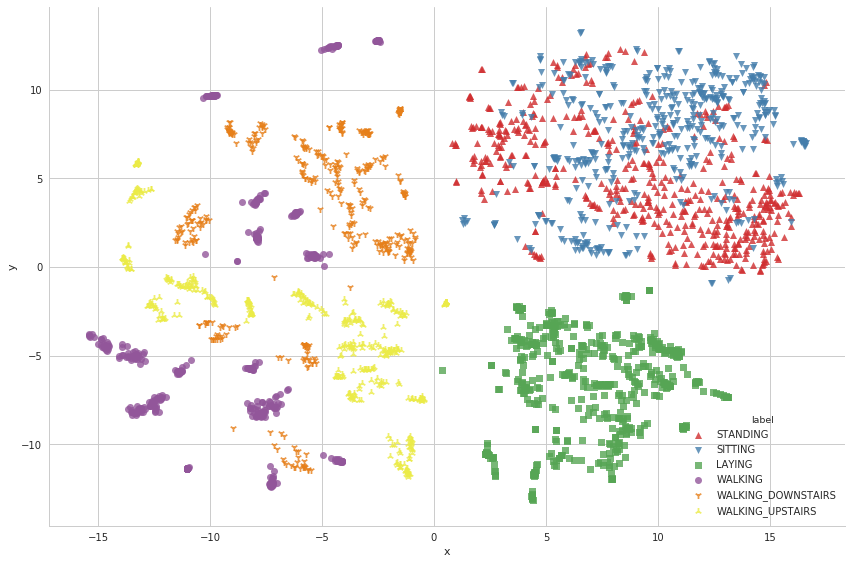

In [469]:
sns.lmplot(x='x', y='y', data=df_tsne, hue='label', fit_reg=False, size=8, aspect=1.5 \
          ,markers=['^','v','s','o', '1','2'], legend_out=False)


plt.show()

In [475]:
counts = test.ActivityName.value_counts()
print(counts)

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: ActivityName, dtype: int64


### 3.3 Visualizing Misclassified Sitting and Standing points in t-sne

In [482]:
# misclassified points of sitting and standing
df_tsne_sit_stand_misclsfd = df_tsne.loc[bool_misclsfd].loc[bool_sit_stand]

# misclassified standing Activities
df_tsne_stand_misclsfd = df_tsne_sit_stand_misclsfd[df_tsne_sit_stand_misclsfd['label'] == 'STANDING']

# misclassified siting Activties
df_tsne_sit_misclsfd = df_tsne_sit_stand_misclsfd[df_tsne_sit_stand_misclsfd['label'] == 'SITTING']

print("Total misclassified points (sitting and standing) : {}".format(df_tsne_sit_stand_misclsfd.shape[0]))

print("\n\t Misclassified Standing : {} ({:,.02f}% of total STANDING values)"\
      .format( df_tsne_stand_misclsfd.shape[0], df_tsne_stand_misclsfd.shape[0]/counts['STANDING'] * 100 ))

print('\n\t Misclassified Sitting  : {} ({:,.02f}% of total SITTING values)'\
      .format(df_tsne_sit_misclsfd.shape[0], df_tsne_sit_misclsfd.shape[0]/counts['SITTING']*100))

Total misclassified points (sitting and standing) : 75

	 Misclassified Standing : 12 (2.26% of total STANDING values)

	 Misclassified Sitting  : 63 (12.83% of total SITTING values)


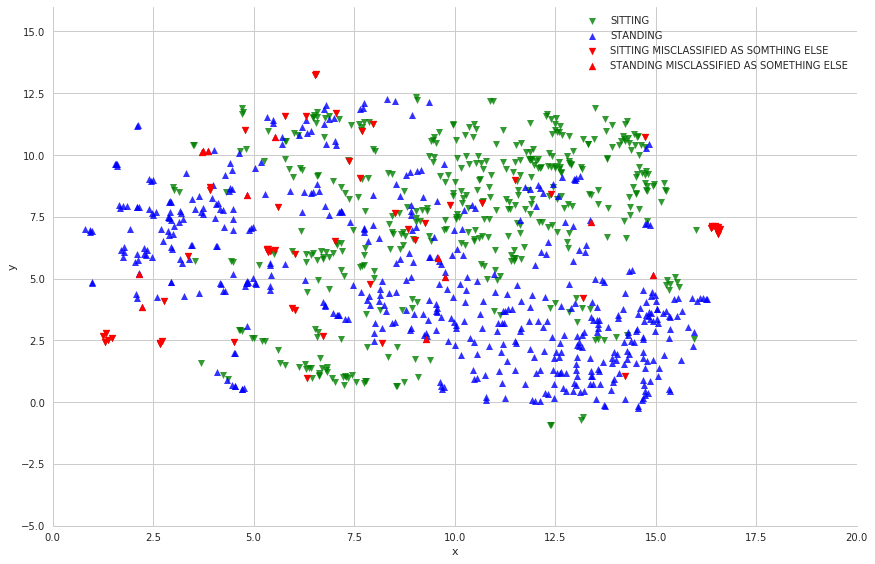

In [488]:
# plot to show the misclassfied points with correctly classified points..
sns.lmplot(x='x', y='y', data=df_tsne[bool_sit_stand], hue='label', hue_order=['SITTING', 'STANDING'],\
           fit_reg=False, size=8,aspect = 1.5,markers=['v','^'], palette = ['g','b'], legend=False)
# plot misclassified points in red
plt.scatter(df_tsne_sit_misclsfd['x'],df_tsne_sit_misclsfd['y'], c='r', marker='v', \
            label="SITTING MISCLASSIFIED AS SOMTHING ELSE")
plt.scatter(df_tsne_stand_misclsfd['x'],df_tsne_stand_misclsfd['y'], c='r',marker='^',\
            label='STANDING MISCLASSIFIED AS SOMETHING ELSE')
plt.legend()
plt.axis([0,20,-5,16])
plt.show()

# 4. Separating SITTING and STANDING

### Using tBodyGyroJerkMagsma and tBodyGyroarCoeffY1

#### WHY.....?

In [493]:
X_train['newJerkMag'] = X_train['tBodyGyroJerkMagsma'] * X_train['tBodyGyroarCoeffY1']
X_test['newJerkMag'] = X_test['tBodyGyroJerkMagsma'] * X_test['tBodyGyroarCoeffY1']

# no of dimensions increased from 561 t0 562
X_train.shape, X_test.shape

((7352, 562), (2947, 562))

In [494]:
log_reg_grid_results.keys()

dict_keys(['training_time', 'testing_time', 'predicted', 'accuracy', 'confusion_matrix', 'classification_report', 'model'])

In [495]:
log_reg_grid_results['model'].best_params_

{'C': 30, 'penalty': 'l2'}

## 4.1 Logistic Regression on the new data

### Confusion_matrix of Logistic Regression

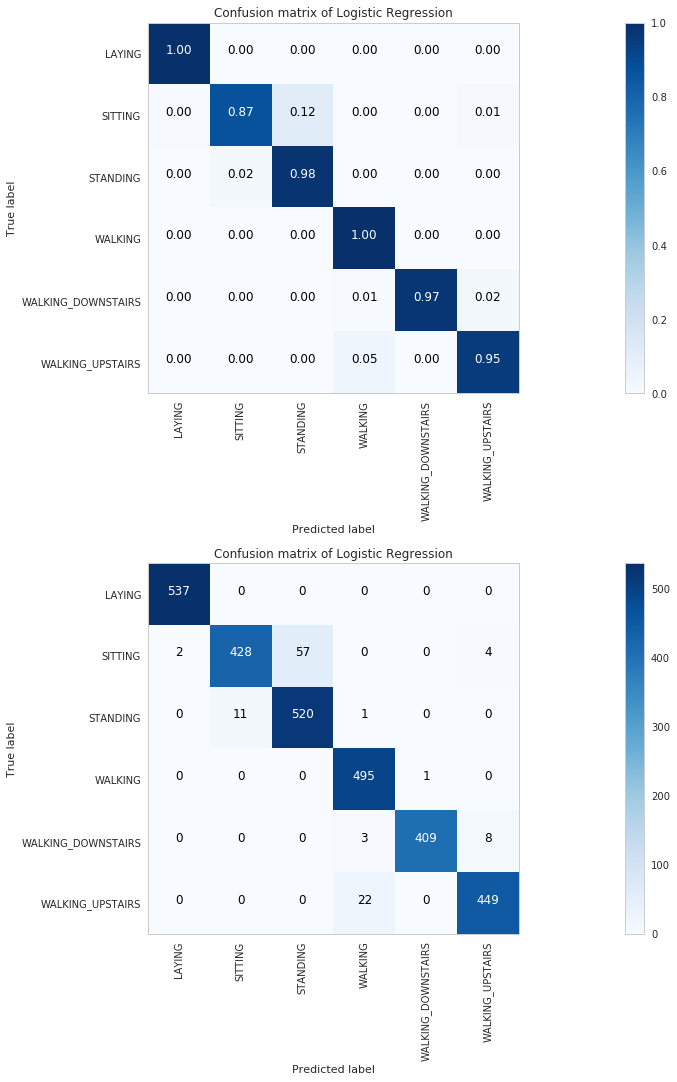

In [504]:
plt.figure(figsize=(30,15))

plt.subplot(2,1,1)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels,\
                      title = 'Confusion matrix of Logistic Regression', normalize=True)
plt.grid(b=False)
plt.subplot(2,1,2)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels,\
                      title = 'Confusion matrix of Logistic Regression' )
plt.grid(b=False)

plt.show()

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.3min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:02:26.847356


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.004829


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


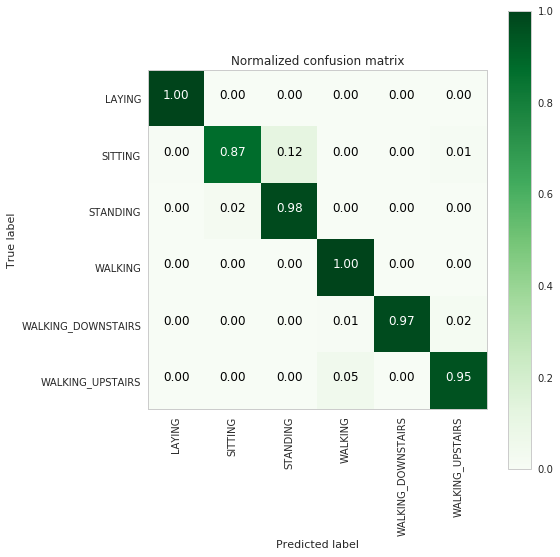

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [501]:
# Logistic Regression with with this newly added feature
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}

new_log_reg = linear_model.LogisticRegression()
new_log_reg_grid = GridSearchCV(new_log_reg, param_grid=parameters, verbose=1, n_jobs=-1)
new_log_reg_grid_results = perform_model(new_log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [503]:
print_grid_search_attributes(new_log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



## 4.2 Linear svm with LinearSVC

### confusion matrix of LinearSVC

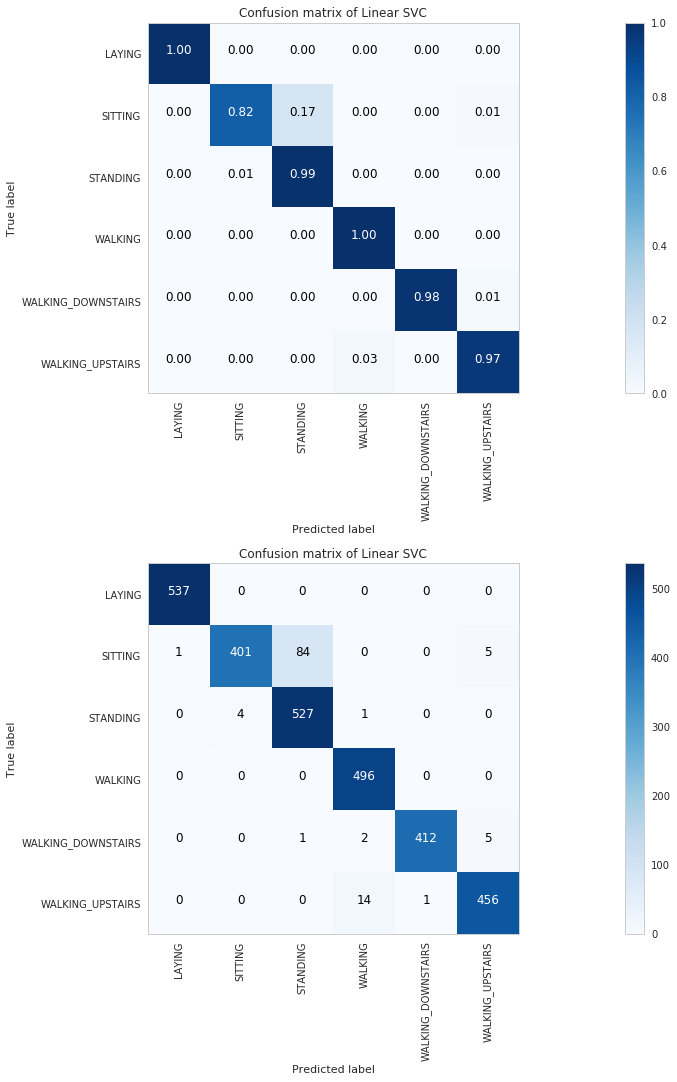

In [505]:
plt.figure(figsize=(30,15))

plt.subplot(2,1,1)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels,\
                      title = 'Confusion matrix of Linear SVC', normalize=True)
plt.grid(b=False)
plt.subplot(2,1,2)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels,\
                      title = 'Confusion matrix of Linear SVC' )
plt.grid(b=False)

plt.show()

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:06.512730


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006487


---------------------
|      Accuracy      |
---------------------

    0.9697997964031219


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 445  41   0   0   3]
 [  0  21 511   0   0   0]
 [  0   0   0 495   0   1]
 [  0   0   0   2 413   5]
 [  0   0   0  13   1 457]]


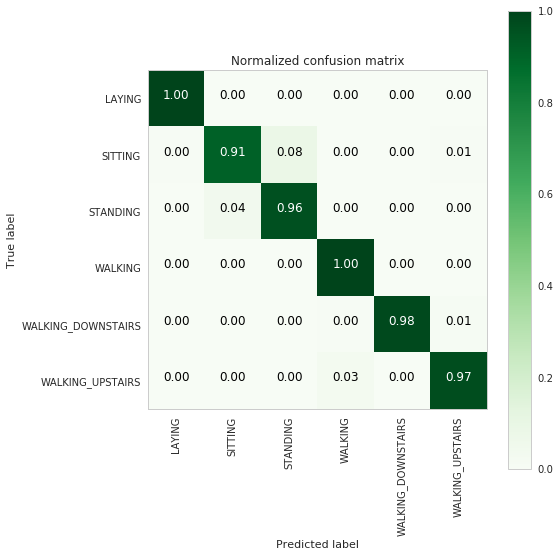

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.95      0.91      0.93       491
          STANDING       0.93      0.96      0.94       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.98       471

       avg / total       0.97      0.97      0.97      2947



In [606]:
# perform LinearSVC to the newly added data

new_lr_svc = LinearSVC(C=4)
new_lr_svc_results = perform_model(new_lr_svc, X_train, y_train, X_test, y_test, class_labels=labels,)

In [607]:
print('{:.03}%'.format(new_lr_svc_results['accuracy'] * 100))

97.0%


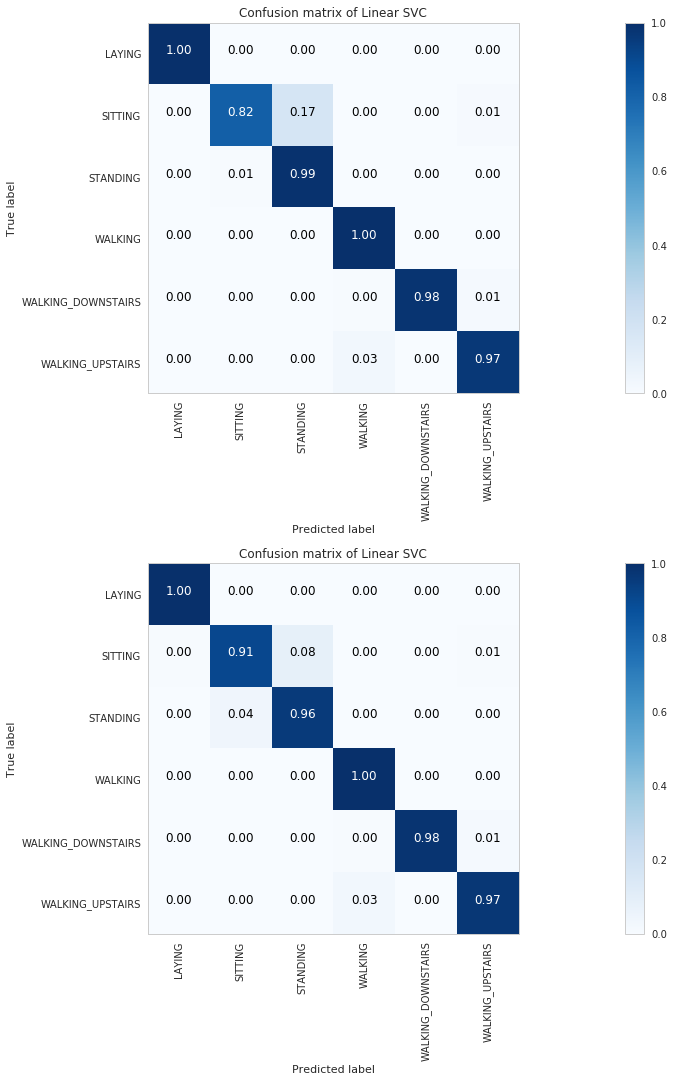

In [611]:
plt.figure(figsize=(30,15))

plt.subplot(2,1,1)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels,\
                      title = 'Confusion matrix of Linear SVC', normalize=True)
plt.grid(b=False)
plt.subplot(2,1,2)
plot_confusion_matrix(new_lr_svc_results['confusion_matrix'], classes=labels,\
                      title = 'Confusion matrix of Linear SVC', normalize = True)
plt.grid(b=False)

plt.show()

# Conclusion :

" ___In real world Domain knowledge,EDA and Feature engineering matters most to the one who solves. Improving performance is the only thing which actually matters to everyone else.___"

* 561 features can be reduced to a set of 37 features with simple featuring engineering from domain knowledge. 


* Simple feature engineering can classify the activites with 89% accuracy(Random forests with reduced features).


* Logistic Regression and Linear SVC are better classifiers in classifying the Activities (96% accuracy).


* Hyperplane is the apt decision boundary in classifying the activities.


* Performance is further increased to 97% using joint features.

# Things we've learnt

* Digging more into domain knowledge gives a new perception of the problem.


* Domain knowledge and EDA are the saviours when we don't have any clue in solving a problem.


* Domain knowledge helps to reduce the features.


* EDA always builds strong understanding of the data.


* Just with proper EDA and feature engineering problem can be solved with fair amount of performance.


* Domain knowledge is very important to increase the performance.


* Feature Engineering and EDA are always the rescue in improving the performance.
